In [6]:
import eniric
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from eniric.atmosphere import Atmosphere
from eniric.Qcalculator import rv_precision
%matplotlib notebook

In [3]:
hdu = fits.open('car-20160325T05h28m38s-sci-gtoc-nir_A_input_TAC.fits')
data_tell = hdu[1].data
wave = data_tell['WAVE'] * 0.0001
flux_in = data_tell['SPEC']
flux_corr = data_tell['tacflux']
trans = data_tell['mtrans']
# hdu[1].data

In [17]:
# Write the transmission file
with open('mtrans_carmenes.txt', 'w') as f:
    for wl, fl in zip(wave, trans):
        f.write("{} {}\n".format(wl,fl))

In [11]:
# Loop over the bands
bands = ["Y", "J", "H"]
Y_mask = (wave > 0.9996668) & (wave < 1.100366)
J_mask = (wave > 1.16961 ) & (wave < 1.330443)
H_mask = (wave > 1.4995) &  (wave < 1.750583)
band_masks = [Y_mask, J_mask, H_mask]
for band, b_mask in zip(bands, band_masks):
    print('RV precision, band ', band)
    # Removing zeros flux points
    mask = b_mask & (flux_corr > 0.)
    atm = Atmosphere.from_band(band, bary=False)
    # Obtain closet telluric model values at the wavelength values (telluric mask is super sampled).
    atm = atm.at(wave[mask])
    # Masking +- 30km/s the telluric lines
    rv_mask_tell = rv_precision(wave[mask], flux_in[mask], mask=atm.mask)
    # Corrected tellurics with Molecfit weighted by the transmission
    rv_corr_tell = rv_precision(wave[mask], flux_corr[mask])
    print('input flux, atm mask: ', rv_mask_tell, ' > masking the tellurics +-30km/s'
      '\ncorr flux, trans mask:', rv_corr_tell, ' > telluric correction')

RV precision, band  Y
input flux, atm mask:  441.0923619866628 m / s  > masking the tellurics +-30km/s
corr flux, trans mask: 430.4798342579149 m / s  > telluric correction
RV precision, band  J
input flux, atm mask:  694.3833776434004 m / s  > masking the tellurics +-30km/s
corr flux, trans mask: 486.87149763989794 m / s  > telluric correction
RV precision, band  H
input flux, atm mask:  480.9353967376479 m / s  > masking the tellurics +-30km/s
corr flux, trans mask: 413.67149051606395 m / s  > telluric correction


<IPython.core.display.Javascript object>


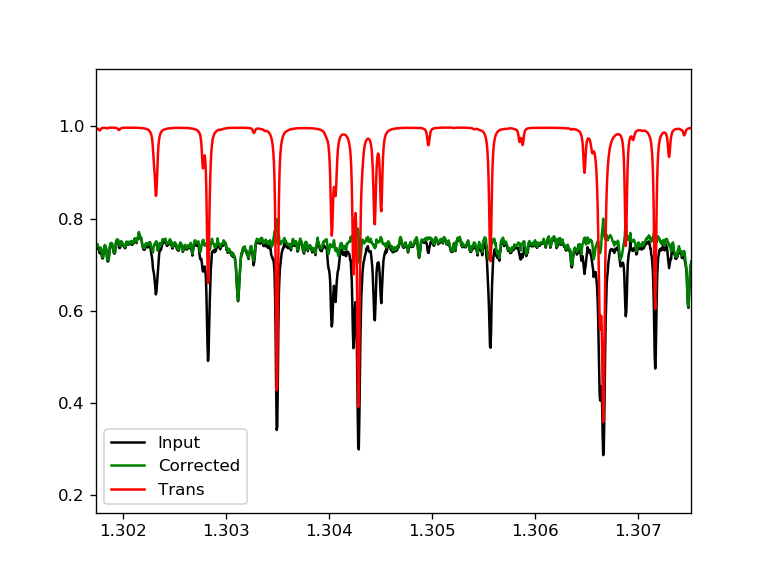

In [8]:
plt.figure()
wl_mask = J_mask
plt.plot(wave[wl_mask], flux_in[wl_mask], 'k-', label='Input')
plt.plot(wave[wl_mask], flux_corr[wl_mask], 'g-', label='Corrected')
plt.plot(wave[wl_mask], data_tell['mtrans'][wl_mask], 'r-', label='Trans')
plt.legend()

In [ ]:
# Problems / Future work
# 1. Need to differentiate between fully corrected lines and not fully corrected lines
# 2. The RV precision is in the 100s of m/s in the paper it's in 10s m/s

In [ ]:
# 1. Excluding not fully corrected telluric lines


In [ ]:
from eniric.Qcalculator import quality
q = quality(wave[mask], flux_in[mask])
q_af = quality(wave[mask], flux_corr[mask])
print(q, q_af)